# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [54]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import urllib
from scipy.stats import linregress


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [55]:
# Generate the Cities List by Using the `citipy` Library

In [56]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
#print(cities)

Number of cities in the list: 614


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [78]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + urllib.request.pathname2url(city)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    #print(city_url)

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | zapadnaya dvina
Processing Record 2 of Set 1 | margaret river
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | cockburn town
Processing Record 5 of Set 1 | newman
Processing Record 6 of Set 1 | bethel
Processing Record 7 of Set 1 | francisco javier mina
Processing Record 8 of Set 1 | iskateley
Processing Record 9 of Set 1 | waitangi
Processing Record 10 of Set 1 | udachny
Processing Record 11 of Set 1 | west island
Processing Record 12 of Set 1 | longyearbyen
Processing Record 13 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 14 of Set 1 | omutinskiy
Processing Record 15 of Set 1 | iqaluit
Processing Record 16 of Set 1 | bredasdorp
Processing Record 17 of Set 1 | wailua homesteads
Processing Record 18 of Set 1 | fort bragg
Processing Record 19 of Set 1 | magumeri
Processing Record 20 of Set 1 | chonchi
Processing Record 21 of Set 1 | sola
Processing Record

Processing Record 39 of Set 4 | tranovaho
City not found. Skipping...
Processing Record 40 of Set 4 | porto sant'elpidio
Processing Record 41 of Set 4 | keetmanshoop
Processing Record 42 of Set 4 | mount gambier
Processing Record 43 of Set 4 | tazovsky
Processing Record 44 of Set 4 | natal
Processing Record 45 of Set 4 | kone
Processing Record 46 of Set 4 | island harbour
Processing Record 47 of Set 4 | rawson
Processing Record 48 of Set 4 | vytegra
Processing Record 49 of Set 4 | sukhinichi
Processing Record 0 of Set 5 | weno
Processing Record 1 of Set 5 | dryden
Processing Record 2 of Set 5 | egilsstadir
Processing Record 3 of Set 5 | bandarbeyla
Processing Record 4 of Set 5 | lompoc
Processing Record 5 of Set 5 | keflavik
Processing Record 6 of Set 5 | usogorsk
Processing Record 7 of Set 5 | lazaro cardenas
Processing Record 8 of Set 5 | ancud
Processing Record 9 of Set 5 | gondar
Processing Record 10 of Set 5 | happy valley-goose bay
Processing Record 11 of Set 5 | ust-nera
Process

Processing Record 30 of Set 8 | domoni
Processing Record 31 of Set 8 | dyurtyuli
Processing Record 32 of Set 8 | buala
Processing Record 33 of Set 8 | castillos
Processing Record 34 of Set 8 | karratha
Processing Record 35 of Set 8 | zakamensk
Processing Record 36 of Set 8 | scarborough
Processing Record 37 of Set 8 | burang
Processing Record 38 of Set 8 | al ghayzah
Processing Record 39 of Set 8 | san antonio
Processing Record 40 of Set 8 | rabigh
Processing Record 41 of Set 8 | tura
Processing Record 42 of Set 8 | mukalla
Processing Record 43 of Set 8 | ja ela
Processing Record 44 of Set 8 | calingasta
Processing Record 45 of Set 8 | stephenville
Processing Record 46 of Set 8 | ternate
Processing Record 47 of Set 8 | lerwick
Processing Record 48 of Set 8 | kaliganj
Processing Record 49 of Set 8 | lorengau
Processing Record 0 of Set 9 | khanty-mansiysk
Processing Record 1 of Set 9 | ocean pointe
City not found. Skipping...
Processing Record 2 of Set 9 | quellon
Processing Record 3 of 

Processing Record 18 of Set 12 | ma'rib
Processing Record 19 of Set 12 | mata-utu
Processing Record 20 of Set 12 | orkney
Processing Record 21 of Set 12 | laikit, laikit ii (dimembe)
Processing Record 22 of Set 12 | sungjibaegam
Processing Record 23 of Set 12 | camocim
Processing Record 24 of Set 12 | mercedes
Processing Record 25 of Set 12 | pionerskiy
Processing Record 26 of Set 12 | sangkhla buri
Processing Record 27 of Set 12 | arraial do cabo
Processing Record 28 of Set 12 | la ronge
Processing Record 29 of Set 12 | holualoa
Processing Record 30 of Set 12 | crane
Processing Record 31 of Set 12 | nabire
Processing Record 32 of Set 12 | keelung
Processing Record 33 of Set 12 | nashik
Processing Record 34 of Set 12 | sayat
Processing Record 35 of Set 12 | krasnoye-na-volge
Processing Record 36 of Set 12 | ploudalmezeau
Processing Record 37 of Set 12 | hanzhong
Processing Record 38 of Set 12 | yar
Processing Record 39 of Set 12 | bowen
Processing Record 40 of Set 12 | pacocha
Processi

In [79]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          592
Lat           592
Lng           592
Max Temp      592
Humidity      592
Cloudiness    592
Wind Speed    592
Country       592
Date          592
dtype: int64

In [80]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,zapadnaya dvina,56.2590,32.0745,17.06,95,96,6.62,RU,1701202955
1,margaret river,-33.9500,115.0667,58.23,90,2,2.86,AU,1701202955
2,adamstown,-25.0660,-130.1015,73.72,86,98,17.07,PN,1701202955
3,cockburn town,21.4612,-71.1419,81.18,70,41,8.95,TC,1701202899
4,newman,37.3138,-121.0208,64.29,10,0,5.35,US,1701202956


In [81]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [82]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,zapadnaya dvina,56.2590,32.0745,17.06,95,96,6.62,RU,1701202955
1,margaret river,-33.9500,115.0667,58.23,90,2,2.86,AU,1701202955
2,adamstown,-25.0660,-130.1015,73.72,86,98,17.07,PN,1701202955
3,cockburn town,21.4612,-71.1419,81.18,70,41,8.95,TC,1701202899
4,newman,37.3138,-121.0208,64.29,10,0,5.35,US,1701202956


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [83]:
import time
date = time.strftime("%m/%d/%Y")
print(date)

11/28/2023


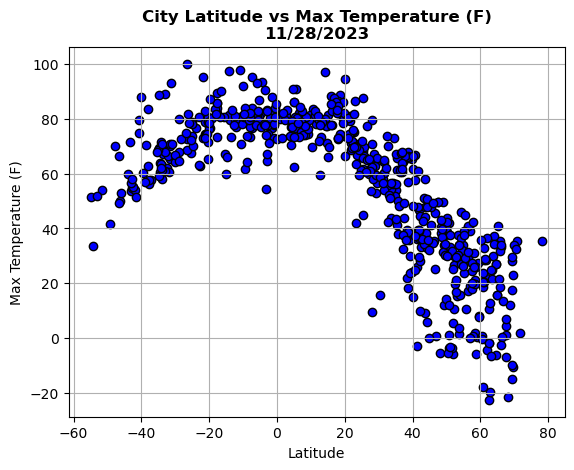

In [84]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", facecolors="blue")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Max Temperature (F)\n{date}", fontweight = "bold")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

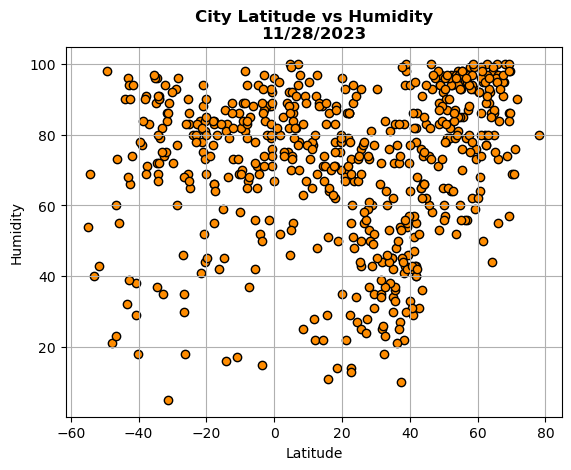

In [85]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", facecolors="darkorange")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Humidity\n{date}", fontweight = "bold")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

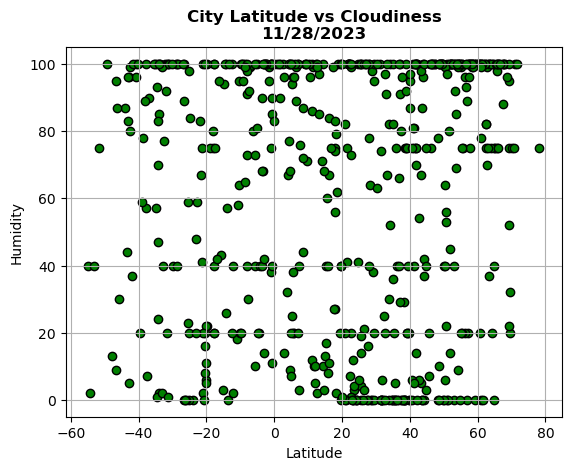

In [86]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", facecolors="green")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Cloudiness\n{date}", fontweight = "bold")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

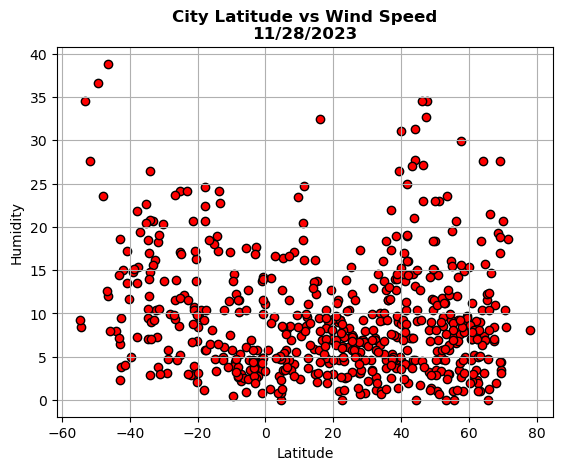

In [87]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", facecolors="red")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Wind Speed\n{date}", fontweight = "bold")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [88]:
# Define a function to create Linear Regression plots
def linregress_plot(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    r_squared = round(rvalue**2,2)
    
    plt.scatter(x, y, marker = "o", color = color, edgecolor = "black")
    plt.plot(x,regress_values,"r-")
    
    plt.annotate(line_eq, position, fontsize = 15, color = "red", fontweight = "bold")
    plt.title(f"{title}\n{date}", fontweight = "bold")
    plt.xlabel("City Latitude")
    plt.ylabel(y_label)
    print(f"The r-squared is: {rvalue}")
    
    plt.savefig(f"output_data/{figname}.png")
    plt.show()
    

In [89]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,zapadnaya dvina,56.2590,32.0745,17.06,95,96,6.62,RU,1701202955
3,cockburn town,21.4612,-71.1419,81.18,70,41,8.95,TC,1701202899
4,newman,37.3138,-121.0208,64.29,10,0,5.35,US,1701202956
5,bethel,41.3712,-73.4140,36.01,51,40,10.36,US,1701202758
6,francisco javier mina,24.4934,-104.4857,66.31,27,0,6.08,MX,1701202957


In [90]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,margaret river,-33.9500,115.0667,58.23,90,2,2.86,AU,1701202955
2,adamstown,-25.0660,-130.1015,73.72,86,98,17.07,PN,1701202955
8,waitangi,-43.9535,-176.5597,59.83,90,87,8.01,NZ,1701202957
10,west island,-12.1568,96.8225,76.98,73,40,10.36,CC,1701202958
14,bredasdorp,-34.5322,20.0403,60.71,72,1,9.51,ZA,1701202873


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.854101685179808


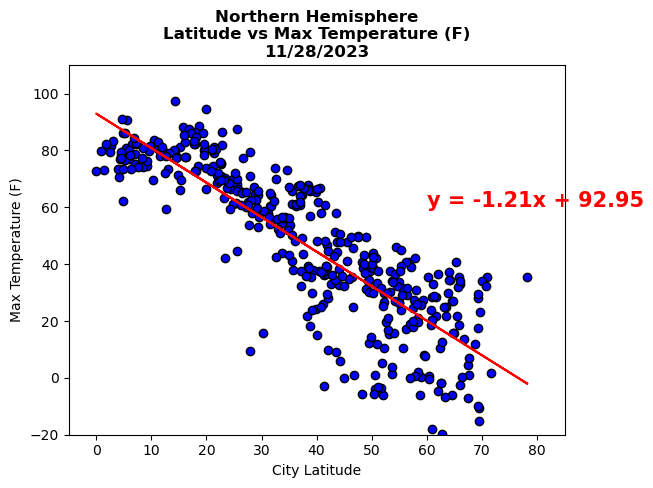

None


In [91]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp"]
y_label = "Max Temperature (F)"
title = f"Northern Hemisphere\nLatitude vs {y_label}"
color = "blue"
position = (60, 60)

plt.xlim(-5, 85)
plt.ylim(-20, 110)
figname = "linreg_n_temp"

print(linregress_plot(x, y))



The r-squared is: 0.6377914206086875


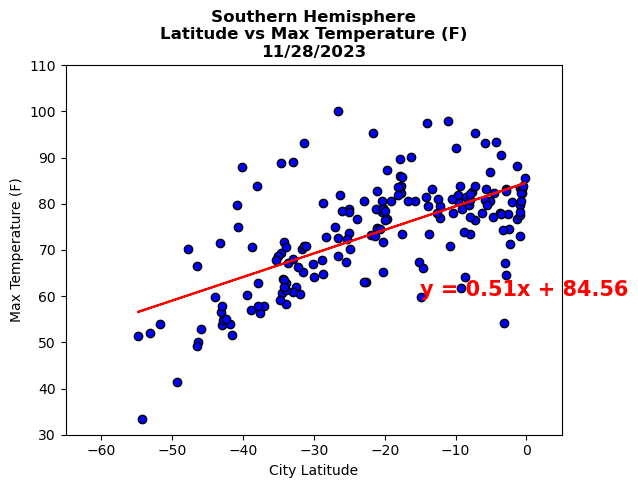

None


In [92]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp"]
y_label = "Max Temperature (F)"
title = f"Southern Hemisphere\nLatitude vs {y_label}"
color = "blue"
position = (-15, 60)

plt.xlim(-65, 5)
plt.ylim(30, 110)
figname = "linreg_s_temp"

print(linregress_plot(x, y))

**Discussion about the linear relationship:** 

The r-squared value for the Northern Hemisphere shows that in the Northern Hemisphere, the city's latitude and the temperature have a strong negative correlation.

The r-squared valuefor the Southern Hemisphere shows that in the Southern Hemisphere, the city's latitude and the temperature have a strong positive correlation.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.24590976802656395


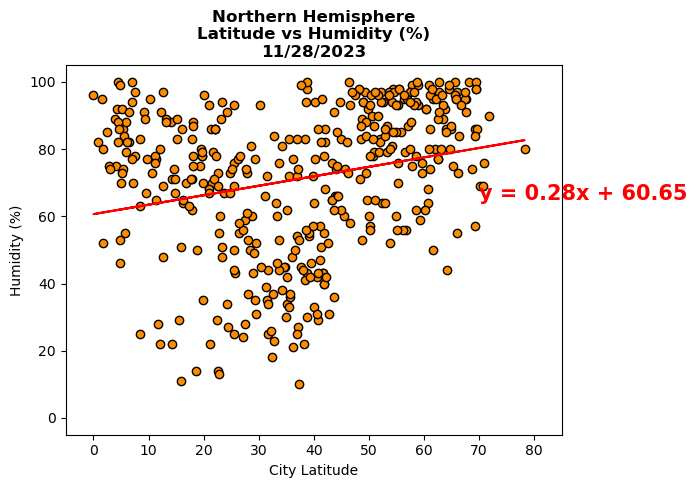

None


In [93]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Humidity"]
y_label = "Humidity (%)"
title = f"Northern Hemisphere\nLatitude vs {y_label}"
color = "darkorange"
position = (70, 65)

plt.xlim(-5, 85)
plt.ylim(-5, 105)
figname = "linreg_n_humid"

print(linregress_plot(x, y))

The r-squared is: 0.1534513915610596


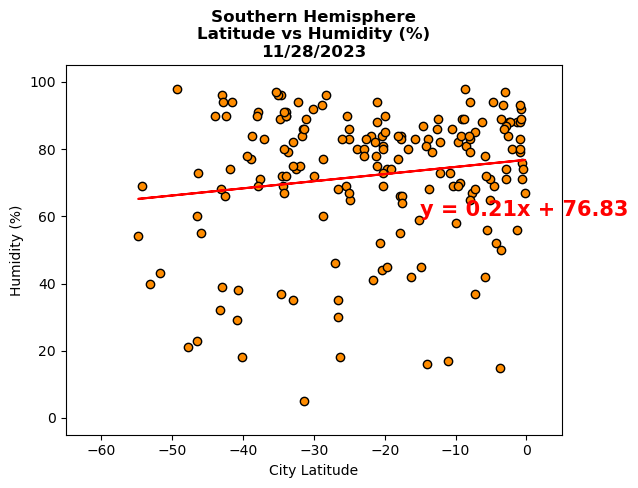

None


In [94]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Humidity"]
y_label = "Humidity (%)"
title = f"Southern Hemisphere\nLatitude vs {y_label}"
color = "darkorange"
position = (-15, 60)

plt.xlim(-65, 5)
plt.ylim(-5, 105)
figname = "linreg_s_humid"

print(linregress_plot(x, y))

**Discussion about the linear relationship:** 

The r-squared value for the Northern Hemisphere shows that in the Northern Hemisphere, the city's latitude and the humidity % have a weak positive correlation.

The r-squared value for the Southern Hemisphere shows that in the Southern Hemisphere, the city's latitude and the humidity % have almost no correlation.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.17671895826568632


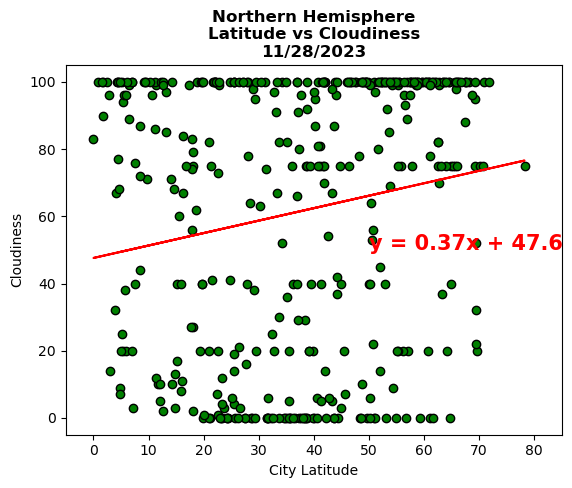

None


In [95]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Cloudiness"]
y_label = "Cloudiness"
title = f"Northern Hemisphere\nLatitude vs {y_label}"
color = "green"
position = (50, 50)

plt.xlim(-5, 85)
plt.ylim(-5, 105)
figname = "linreg_n_cloud"

print(linregress_plot(x, y))

The r-squared is: 0.08278193539744653


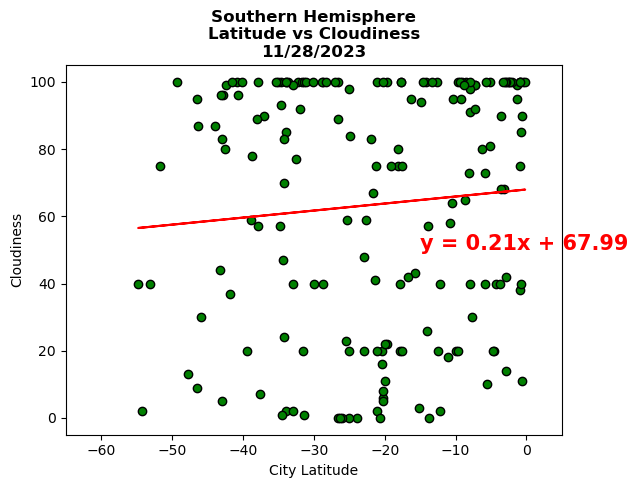

None


In [96]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Cloudiness"]
y_label = "Cloudiness"
title = f"Southern Hemisphere\nLatitude vs {y_label}"
color = "green"
position = (-15, 50)

plt.xlim(-65, 5)
plt.ylim(-5, 105)
figname = "linreg_s_cloud"

print(linregress_plot(x, y))

**Discussion about the linear relationship:** 

The r-squared value for the Northern Hemisphere shows that in the Northern Hemisphere, the city's latitude and the cloudiness have a weak positive correlation.

The r-squared valuefor the Southern Hemisphere shows that in the Southern Hemisphere, the city's latitude and the cloudiness have almost no correlation.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.1171906439561141


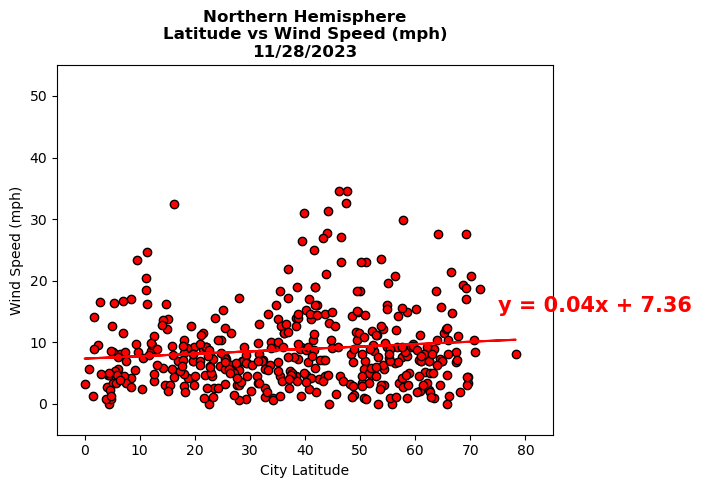

None


In [97]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Wind Speed"]
y_label = "Wind Speed (mph)"
title = f"Northern Hemisphere\nLatitude vs {y_label}"
color = "red"
position = (75, 15)

plt.xlim(-5, 85)
plt.ylim(-5, 55)
figname = "linreg_n_wind"

print(linregress_plot(x, y))

The r-squared is: -0.40824614887596655


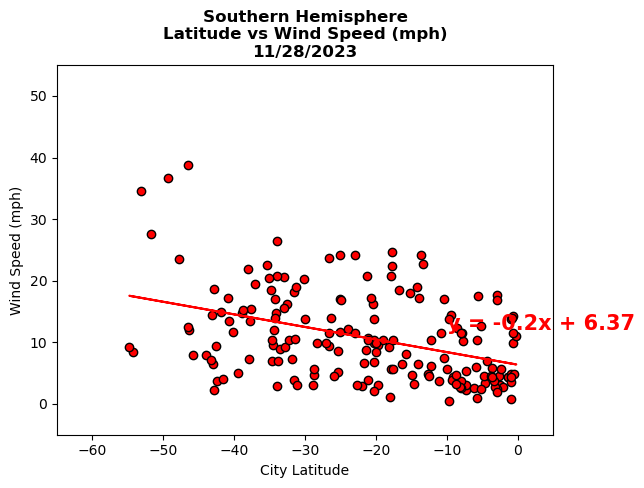

None


In [98]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Wind Speed"]
y_label = "Wind Speed (mph)"
title = f"Southern Hemisphere\nLatitude vs {y_label}"
color = "red"
position = (-10, 12)

plt.xlim(-65, 5)
plt.ylim(-5, 55)
figname = "linreg_s_wind"

print(linregress_plot(x, y))

**Discussion about the linear relationship:** 

The r-squared value for the Northern Hemisphere shows that in the Northern Hemisphere, the city's latitude and wind speed have almost no correlation.

The r-squared value for the Southern Hemisphere shows that in the Southern Hemisphere, the city's latitude and wind speed have a weak negative correlation.